In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

In [3]:
df = yf.download('UTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-22,0.988407,1.000427,0.984352,0.998326,0.998326,109226
2022-03-23,0.998339,1.090443,0.944837,0.976418,0.976418,119846
2022-03-24,0.976456,96.752182,0.954138,1.185126,1.185126,152960
2022-03-25,1.185131,1.192514,1.180614,1.188583,1.188583,127456
2022-03-26,1.188603,1.212403,1.181608,1.191077,1.191077,130188
...,...,...,...,...,...,...
2023-06-01,3.913131,3.913131,3.913131,3.913131,3.913131,0
2023-06-02,3.913131,3.913131,3.913131,3.913131,3.913131,0
2023-06-03,3.913131,3.913131,3.913131,3.913131,3.913131,0


In [6]:
!pip install statsmodels

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error , mean_absolute_error

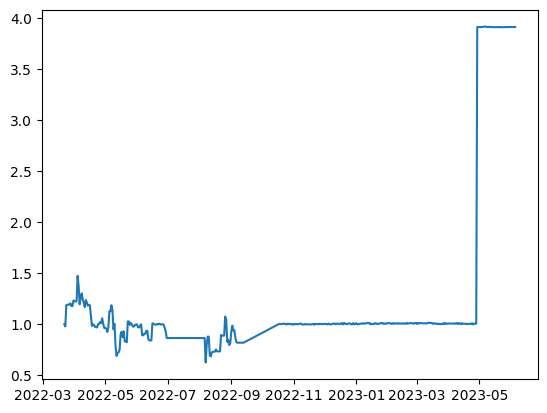

In [10]:
plt.plot(df.index,df['Adj Close'])
plt.show()

In [24]:
to_row = int(len(df)*0.9)
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])


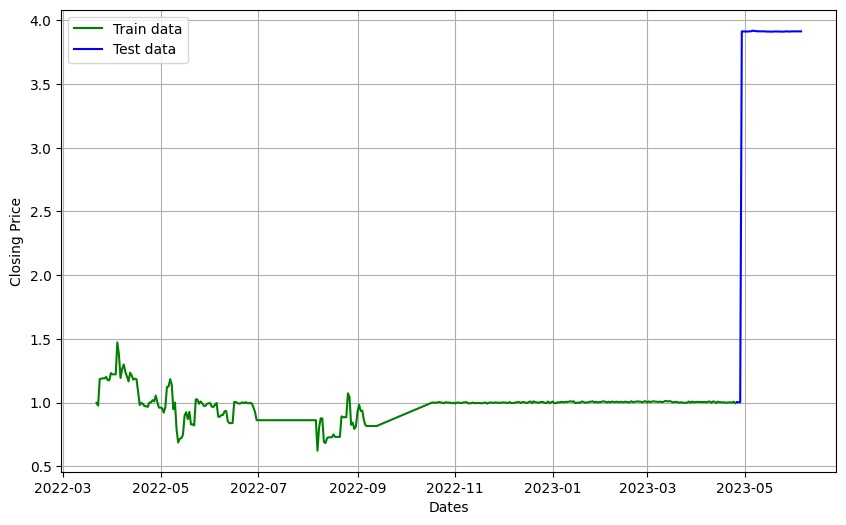

In [26]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(df[0:to_row]['Adj Close'],'green',label='Train data')
plt.plot(df[to_row:]['Adj Close'],'blue',label='Test data')
plt.legend()

In [27]:
model_predictions = []
n_test_obser = len(testing_data)

In [34]:
for i in range(n_test_obser):
  model = ARIMA(training_data,order = (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  ythat = list(output)[0]
  model_predictions.append(ythat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)


In [32]:
list(output)[0]

0.9955261553278271

In [35]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  407
Model:                 ARIMA(4, 1, 0)   Log Likelihood                 191.814
Date:                Fri, 05 Apr 2024   AIC                           -373.629
Time:                        18:06:39   BIC                           -353.597
Sample:                             0   HQIC                          -365.700
                                - 407                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0035      0.326     -0.011      0.992      -0.643       0.636
ar.L2         -0.0153      0.152     -0.101      0.920      -0.314       0.283
ar.L3          0.0021      0.445      0.005      0.9

In [40]:
len(model_predictions)

41

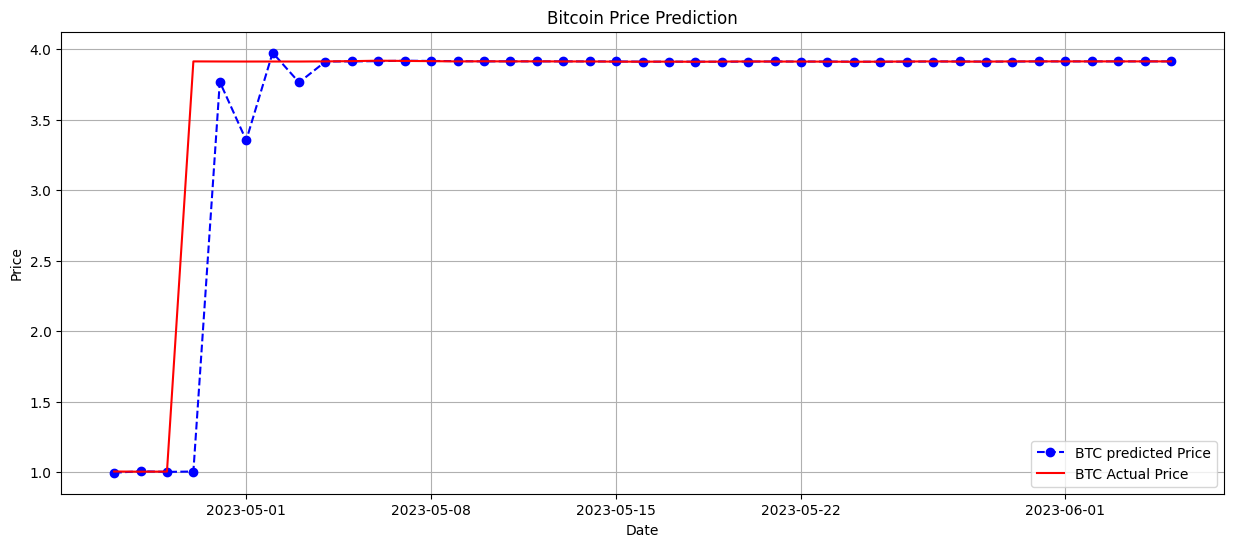

In [41]:
plt.figure(figsize=(15,6))
plt.grid(True)

data_range = df[to_row:].index

plt.plot(data_range, model_predictions,color = 'blue',marker= 'o',linestyle='dashed',label = 'BTC predicted Price')
plt.plot(data_range, testing_data, color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()